# Bank Customer Churn Prediction - Exploratory Data Analysis

## 🎯 Project Overview

This notebook performs comprehensive **Exploratory Data Analysis (EDA)** for the Bank Customer Churn Prediction project. We'll analyze customer behavior patterns, identify key churn drivers, and prepare insights for feature engineering.

### 📊 Business Context
- **Problem**: Predict which customers are likely to churn before they leave
- **Impact**: Customer acquisition costs 5-10x more than retention
- **Goal**: Build actionable ML model for proactive retention strategies

### 📋 Analysis Agenda
1. **Data Loading & Initial Inspection**
2. **Dataset Overview & Statistics**
3. **Missing Values Analysis**
4. **Target Variable Analysis (Churn Rate)**
5. **Feature Distributions & Patterns**
6. **Correlation Analysis**
7. **Churn Behavior Analysis**
8. **Feature Engineering Opportunities**
9. **Data Quality Assessment**
10. **Key Insights & Recommendations**

---


In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("📚 Libraries imported successfully!")
print("🎨 Visualization settings configured!")



📚 Libraries imported successfully!
🎨 Visualization settings configured!


## Data Loading & Initial Inspection

In [33]:
# Load the dataset
df = pd.read_csv('./data/Customer-Churn-Records.csv')

print("📊 Dataset loaded successfully!")
print(f"📏 Dataset shape: {df.shape}")
print(f"📋 Features: {df.shape[1]}")
print(f"👥 Customers: {df.shape[0]:,}")

# Display first few rows
print("\n🔍 First 5 rows:")
df.head()


📊 Dataset loaded successfully!
📏 Dataset shape: (10000, 18)
📋 Features: 18
👥 Customers: 10,000

🔍 First 5 rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [34]:
# Basic dataset information
print("📊 Dataset Info:")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n📋 Column Data Types:")
df.dtypes

📊 Dataset Info:
Memory usage: 3.16 MB

📋 Column Data Types:


RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [35]:
# Feature categorization
categorical_features = ['Geography', 'Gender', 'Card Type']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']
binary_features = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
id_features = ['RowNumber', 'CustomerId', 'Surname']

print("🏷️  Feature Categories:")
print(f"Categorical: {categorical_features}")
print(f"Numerical: {numerical_features}")
print(f"Binary: {binary_features}")
print(f"ID/Name: {id_features}")
print(f"Target: Exited (1=Churned, 0=Retained)")

# Basic statistics
print(f"\n📊 Basic Statistics:")
df.describe()

🏷️  Feature Categories:
Categorical: ['Geography', 'Gender', 'Card Type']
Numerical: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']
Binary: ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
ID/Name: ['RowNumber', 'CustomerId', 'Surname']
Target: Exited (1=Churned, 0=Retained)

📊 Basic Statistics:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## 3. Target Variable Analysis (Churn Rate)

🎯 Target Variable Analysis:
Overall Churn Rate: 20.38%
Retained Customers: 7,962 (79.62%)
Churned Customers: 2,038 (20.38%)


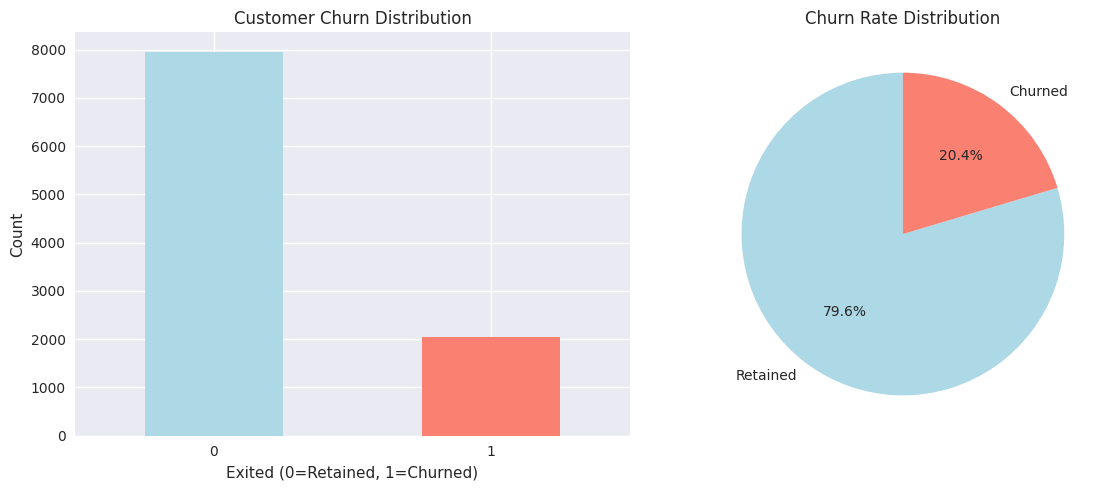


⚖️ Class Balance:
Retained:Churned ratio = 3.91:1
⚠️ Moderately imbalanced dataset - monitor model performance


In [36]:
# Target variable analysis
churn_counts = df['Exited'].value_counts()
churn_rate = df['Exited'].mean()

print("🎯 Target Variable Analysis:")
print(f"Overall Churn Rate: {churn_rate:.2%}")
print(f"Retained Customers: {churn_counts[0]:,} ({churn_counts[0]/len(df):.2%})")
print(f"Churned Customers: {churn_counts[1]:,} ({churn_counts[1]/len(df):.2%})")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Customer Churn Distribution')
axes[0].set_xlabel('Exited (0=Retained, 1=Churned)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
           colors=['lightblue', 'salmon'], startangle=90)
axes[1].set_title('Churn Rate Distribution')

plt.tight_layout()
plt.show()

# Class balance assessment
balance_ratio = churn_counts[0] / churn_counts[1]
print(f"\n⚖️ Class Balance:")
print(f"Retained:Churned ratio = {balance_ratio:.2f}:1")

if churn_rate < 0.1 or churn_rate > 0.9:
    print("⚠️ Highly imbalanced dataset - consider sampling techniques")
elif churn_rate < 0.3 or churn_rate > 0.7:
    print("⚠️ Moderately imbalanced dataset - monitor model performance")
else:
    print("✅ Reasonably balanced dataset")



## 4. Categorical Features Analysis

🏷️ Categorical Features Analysis:

Geography distribution:
  France: 5,014 (50.1%)
  Germany: 2,509 (25.1%)
  Spain: 2,477 (24.8%)

Gender distribution:
  Male: 5,457 (54.6%)
  Female: 4,543 (45.4%)

Card Type distribution:
  DIAMOND: 2,507 (25.1%)
  GOLD: 2,502 (25.0%)
  SILVER: 2,496 (25.0%)
  PLATINUM: 2,495 (24.9%)

Churn rate by Geography:
  France: 16.2% (811.0/5014.0)
  Germany: 32.4% (814.0/2509.0)
  Spain: 16.7% (413.0/2477.0)

Churn rate by Gender:
  Female: 25.1% (1139.0/4543.0)
  Male: 16.5% (899.0/5457.0)

Churn rate by Card Type:
  DIAMOND: 21.8% (546.0/2507.0)
  GOLD: 19.3% (482.0/2502.0)
  PLATINUM: 20.4% (508.0/2495.0)
  SILVER: 20.1% (502.0/2496.0)


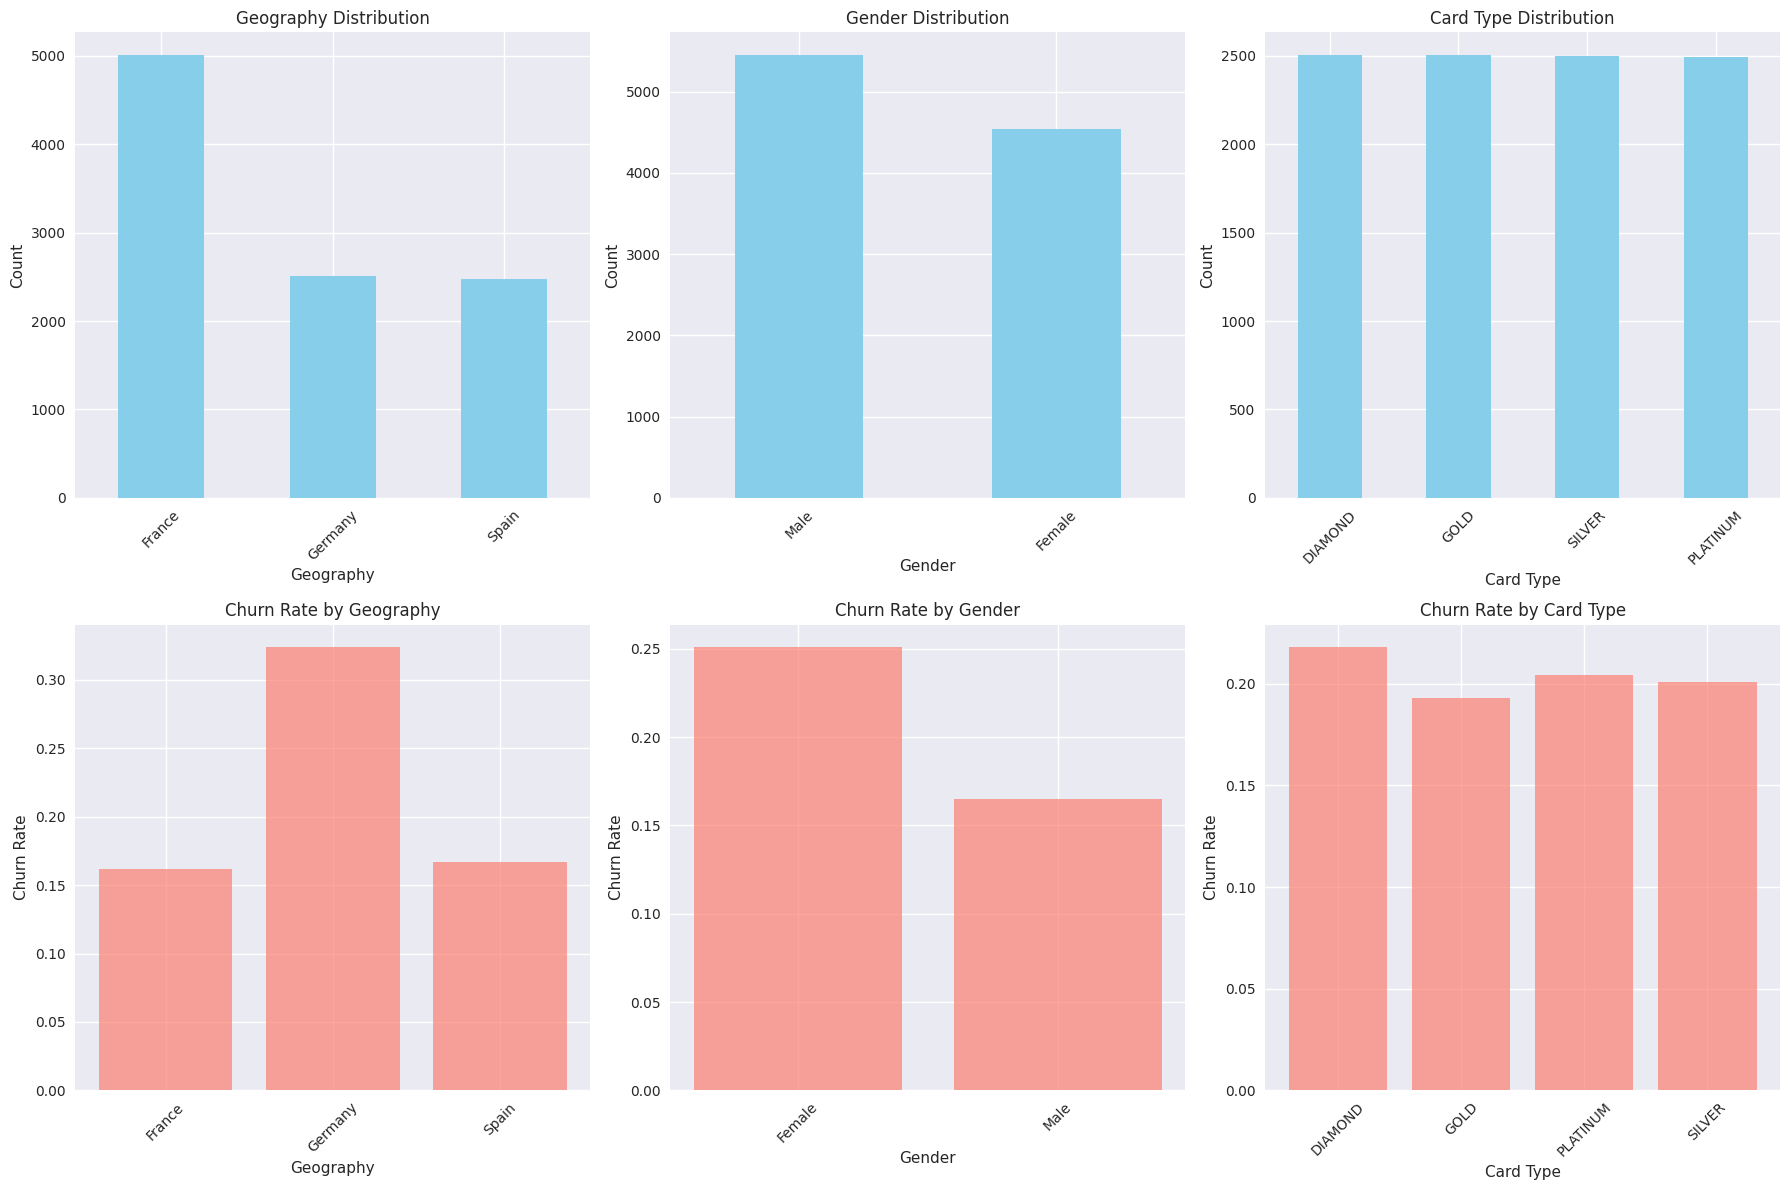

In [37]:
# Categorical features analysis
print("🏷️ Categorical Features Analysis:")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Distribution of categorical feature
    feature_counts = df[feature].value_counts()
    feature_counts.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    print(f"\n{feature} distribution:")
    for value, count in feature_counts.items():
        print(f"  {value}: {count:,} ({count/len(df):.1%})")

# Churn rate by categorical features
for i, feature in enumerate(categorical_features):
    churn_by_category = df.groupby(feature)['Exited'].agg(['count', 'sum', 'mean']).round(3)
    churn_by_category['churn_rate'] = churn_by_category['mean']
    
    axes[i+3].bar(churn_by_category.index, churn_by_category['churn_rate'], color='salmon', alpha=0.7)
    axes[i+3].set_title(f'Churn Rate by {feature}')
    axes[i+3].set_xlabel(feature)
    axes[i+3].set_ylabel('Churn Rate')
    axes[i+3].tick_params(axis='x', rotation=45)
    
    print(f"\nChurn rate by {feature}:")
    for idx, row in churn_by_category.iterrows():
        print(f"  {idx}: {row['churn_rate']:.1%} ({row['sum']}/{row['count']})")

plt.tight_layout()
plt.show()



## 5. Numerical Features Analysis

📊 Numerical Features Analysis:

CreditScore Statistics:
  Retained - Mean: 651.84, Median: 653.00, Std: 95.65
  Churned  - Mean: 645.41, Median: 646.00, Std: 100.34
  T-test p-value: 0.007422 ✅ Significant

Age Statistics:
  Retained - Mean: 37.41, Median: 36.00, Std: 10.13
  Churned  - Mean: 44.84, Median: 45.00, Std: 9.76
  T-test p-value: 0.000000 ✅ Significant

Tenure Statistics:
  Retained - Mean: 5.03, Median: 5.00, Std: 2.88
  Churned  - Mean: 4.93, Median: 5.00, Std: 2.94
  T-test p-value: 0.172104 ❌ Not significant

Balance Statistics:
  Retained - Mean: 72742.75, Median: 92063.06, Std: 62851.58
  Churned  - Mean: 91109.48, Median: 109344.23, Std: 58346.48
  T-test p-value: 0.000000 ✅ Significant

NumOfProducts Statistics:
  Retained - Mean: 1.54, Median: 2.00, Std: 0.51
  Churned  - Mean: 1.48, Median: 1.00, Std: 0.80
  T-test p-value: 0.000002 ✅ Significant

EstimatedSalary Statistics:
  Retained - Mean: 99726.85, Median: 99620.35, Std: 57399.96
  Churned  - Mean: 101509.91,

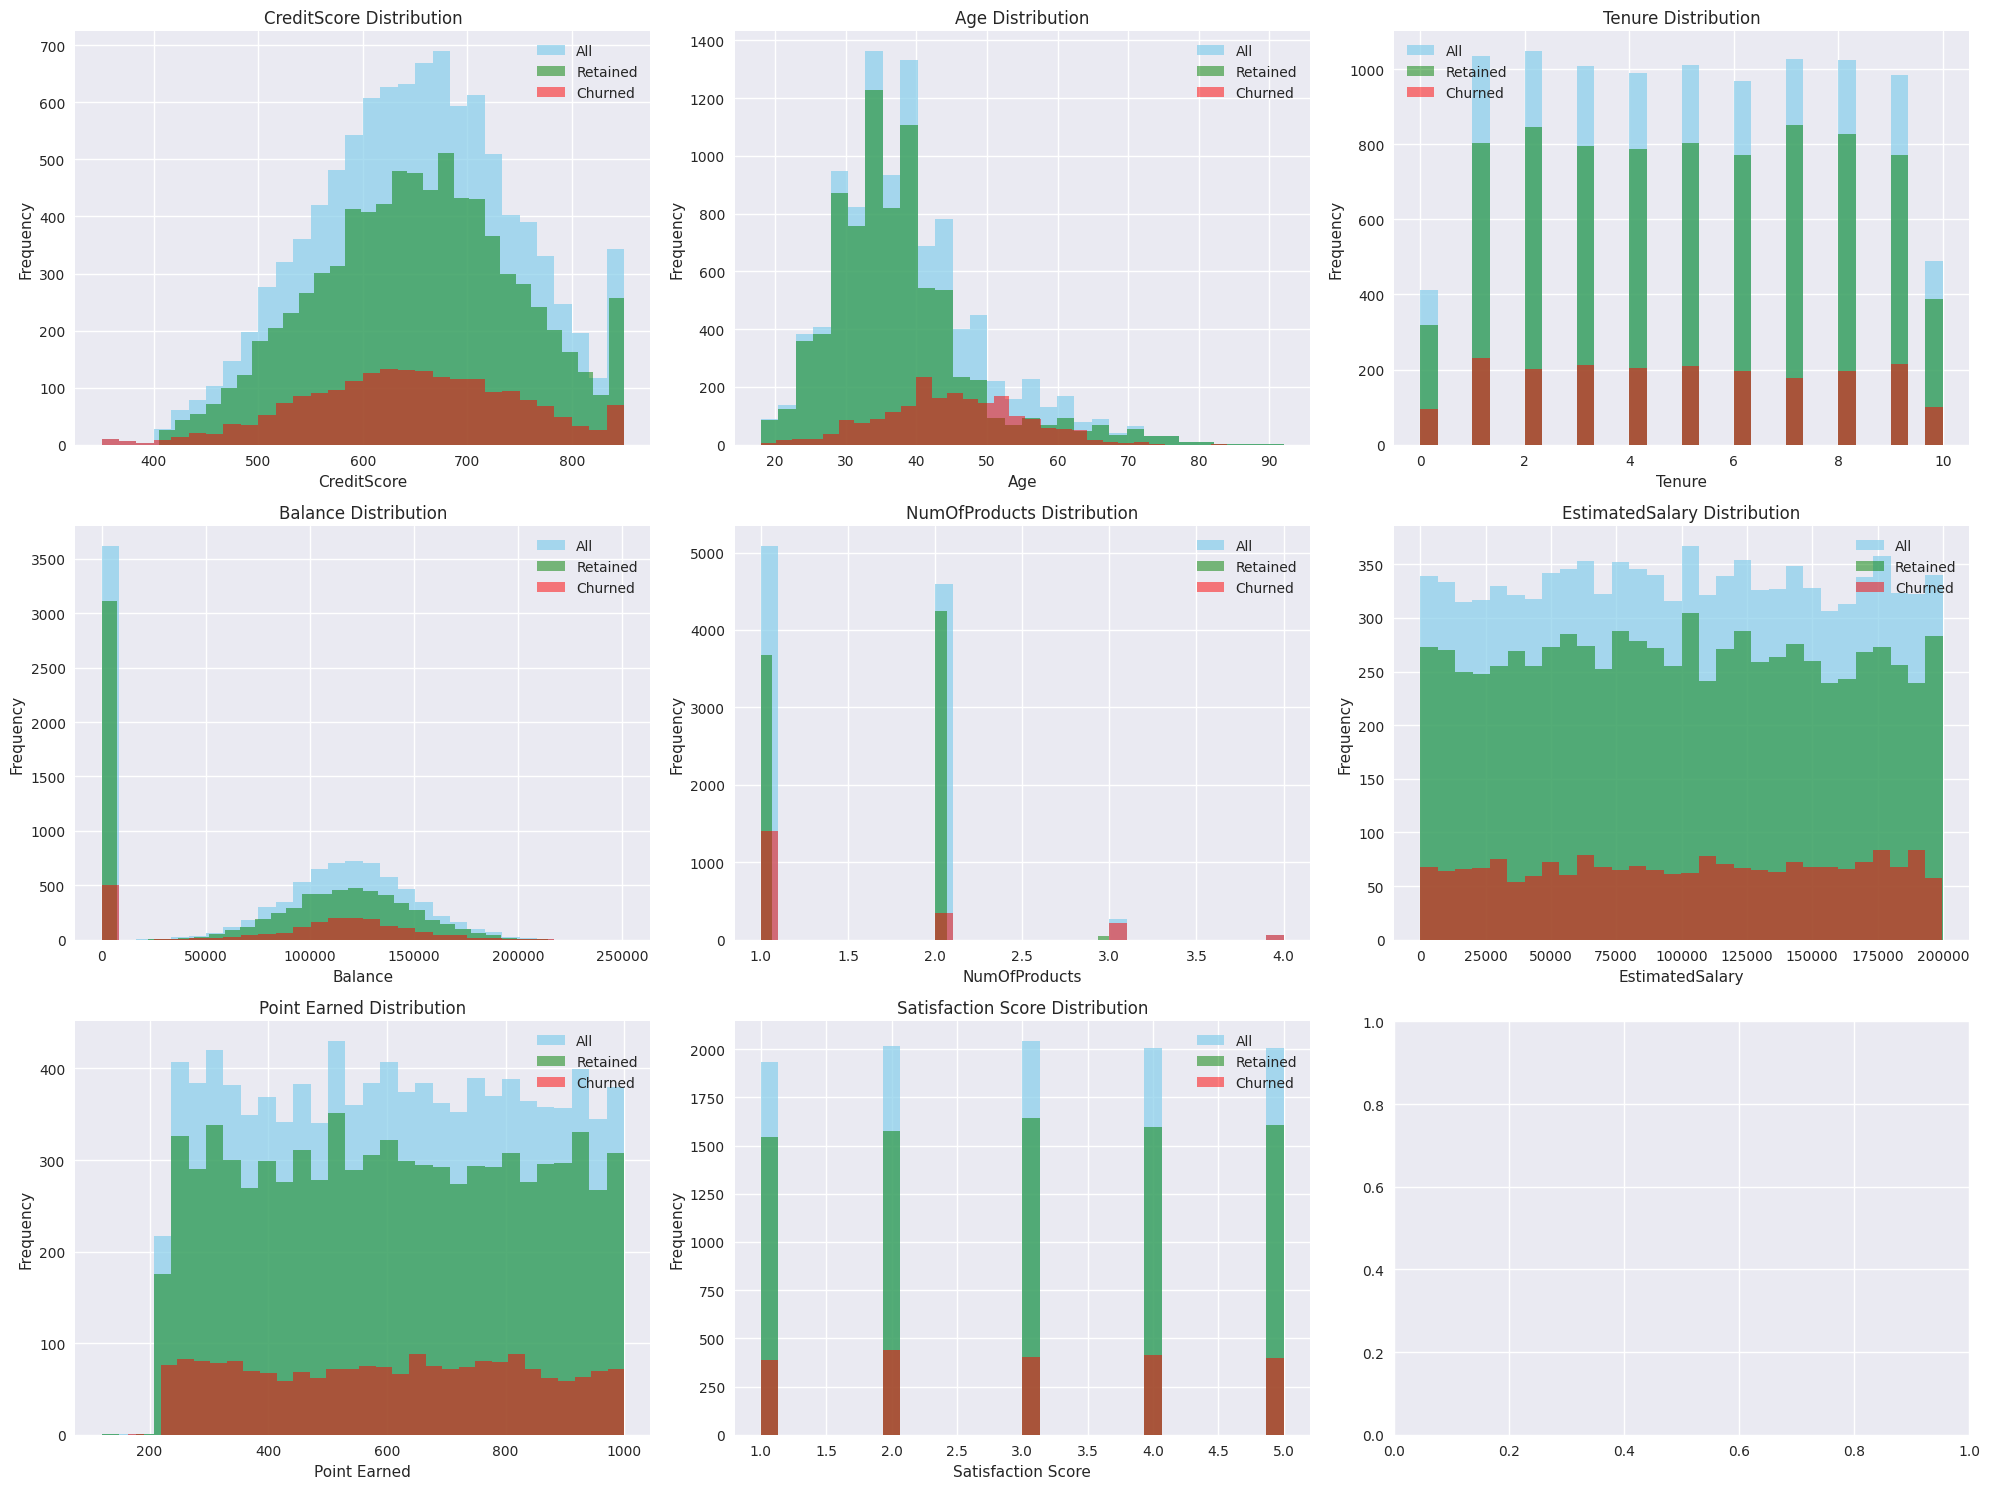

In [38]:
# Numerical features analysis
print("📊 Numerical Features Analysis:")

# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histogram for all customers
    axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', label='All')
    
    # Overlay histograms for churned vs retained
    axes[i].hist(df[df['Exited']==0][feature], bins=30, alpha=0.5, color='green', label='Retained')
    axes[i].hist(df[df['Exited']==1][feature], bins=30, alpha=0.5, color='red', label='Churned')
    
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    
    # Statistical summary
    retained_stats = df[df['Exited']==0][feature].describe()
    churned_stats = df[df['Exited']==1][feature].describe()
    
    print(f"\n{feature} Statistics:")
    print(f"  Retained - Mean: {retained_stats['mean']:.2f}, Median: {retained_stats['50%']:.2f}, Std: {retained_stats['std']:.2f}")
    print(f"  Churned  - Mean: {churned_stats['mean']:.2f}, Median: {churned_stats['50%']:.2f}, Std: {churned_stats['std']:.2f}")
    
    # Statistical test (t-test)
    retained_values = df[df['Exited']==0][feature]
    churned_values = df[df['Exited']==1][feature]
    t_stat, p_value = stats.ttest_ind(retained_values, churned_values)
    print(f"  T-test p-value: {p_value:.6f} {'✅ Significant' if p_value < 0.05 else '❌ Not significant'}")

plt.tight_layout()
plt.show()



## 6. Correlation Analysis

🔗 Correlation Analysis:


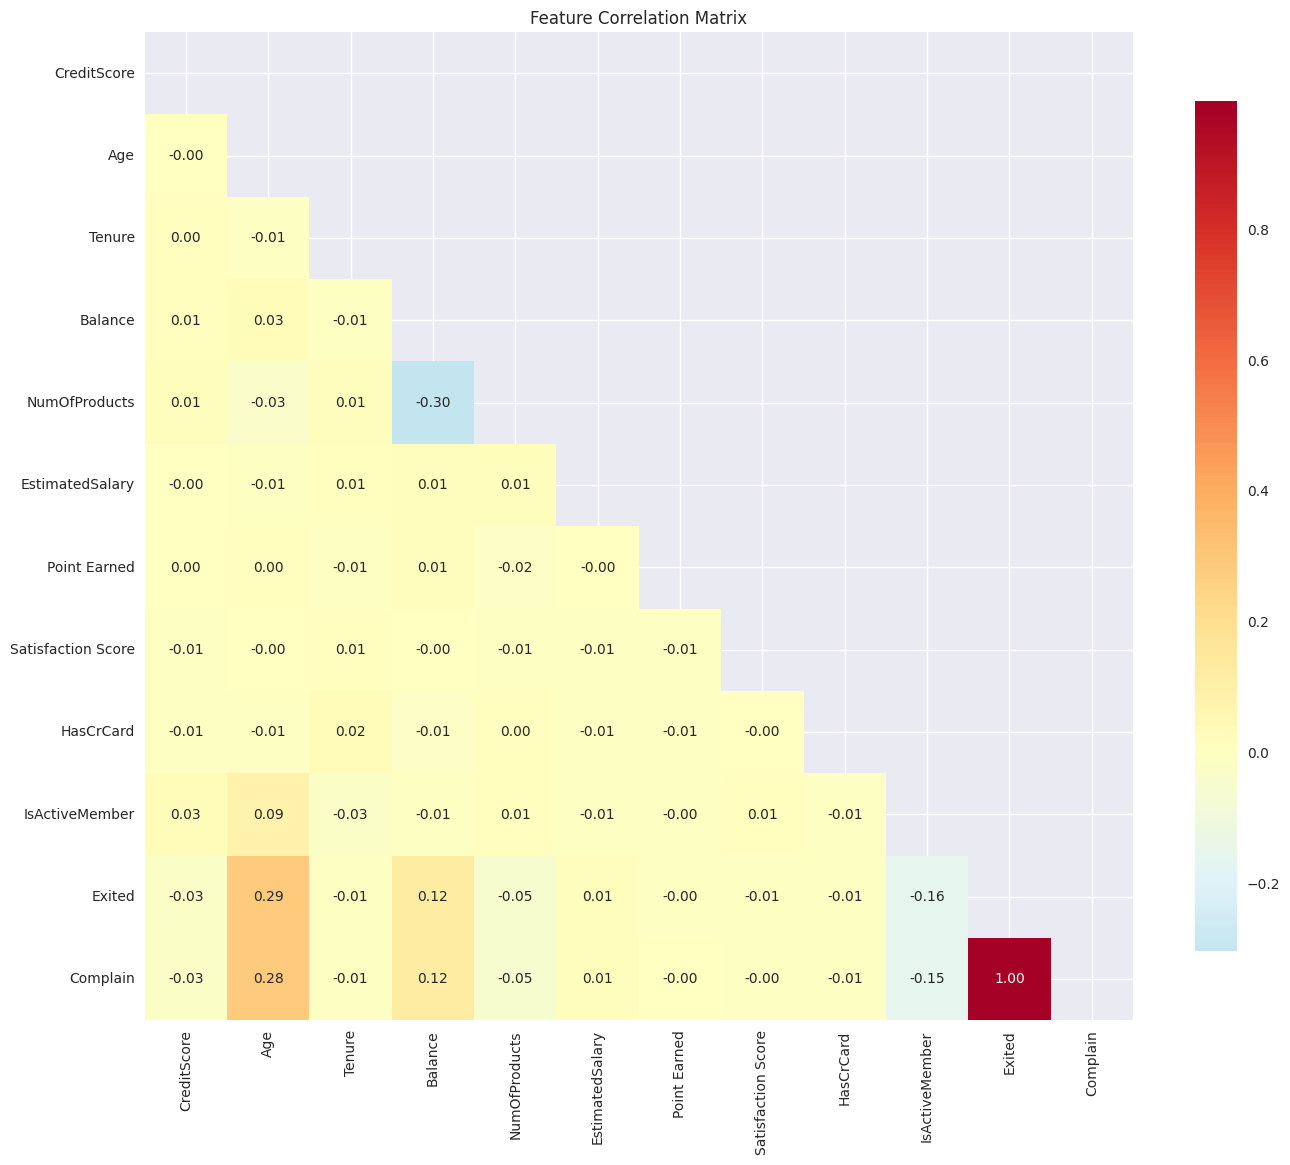


🎯 Correlation with Churn (Exited):
Top positive correlations (higher values = more likely to churn):
  Complain: 0.996
  Age: 0.285
  Balance: 0.119
  EstimatedSalary: 0.012

Top negative correlations (higher values = less likely to churn):
  CreditScore: -0.027
  Tenure: -0.014
  HasCrCard: -0.007
  Satisfaction Score: -0.006
  Point Earned: -0.005

⚠️ High correlations between features (>0.7 or <-0.7):
  Exited ↔ Complain: 0.996


In [39]:
# Correlation analysis
print("🔗 Correlation Analysis:")

# Select numerical columns for correlation
numerical_cols = numerical_features + binary_features
correlation_data = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Correlation with target variable
target_correlation = df[numerical_cols].corr()['Exited'].drop('Exited').sort_values(key=abs, ascending=False)

print("\n🎯 Correlation with Churn (Exited):")
print("Top positive correlations (higher values = more likely to churn):")
positive_corr = target_correlation[target_correlation > 0].head(5)
for feature, corr in positive_corr.items():
    print(f"  {feature}: {corr:.3f}")

print("\nTop negative correlations (higher values = less likely to churn):")
negative_corr = target_correlation[target_correlation < 0].tail(5)
for feature, corr in negative_corr.items():
    print(f"  {feature}: {corr:.3f}")

# High correlations between features (potential multicollinearity)
print("\n⚠️ High correlations between features (>0.7 or <-0.7):")
high_corr_pairs = []
for i in range(len(correlation_data.columns)):
    for j in range(i+1, len(correlation_data.columns)):
        corr_val = correlation_data.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((correlation_data.columns[i], correlation_data.columns[j], corr_val))

if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("  ✅ No high correlations found between features")



## 7. Binary Features & Churn Behavior Analysis

🔘 Binary Features & Churn Analysis:

HasCrCard vs Churn:
  No: 20.8% (613.0/2945.0)
  Yes: 20.2% (1425.0/7055.0)
  Chi-square test p-value: 0.502618 ❌ Not significant

IsActiveMember vs Churn:
  No: 26.9% (1303.0/4849.0)
  Yes: 14.3% (735.0/5151.0)
  Chi-square test p-value: 0.000000 ✅ Significant

Complain vs Churn:
  No: 0.1% (4.0/7956.0)
  Yes: 99.5% (2034.0/2044.0)
  Chi-square test p-value: 0.000000 ✅ Significant


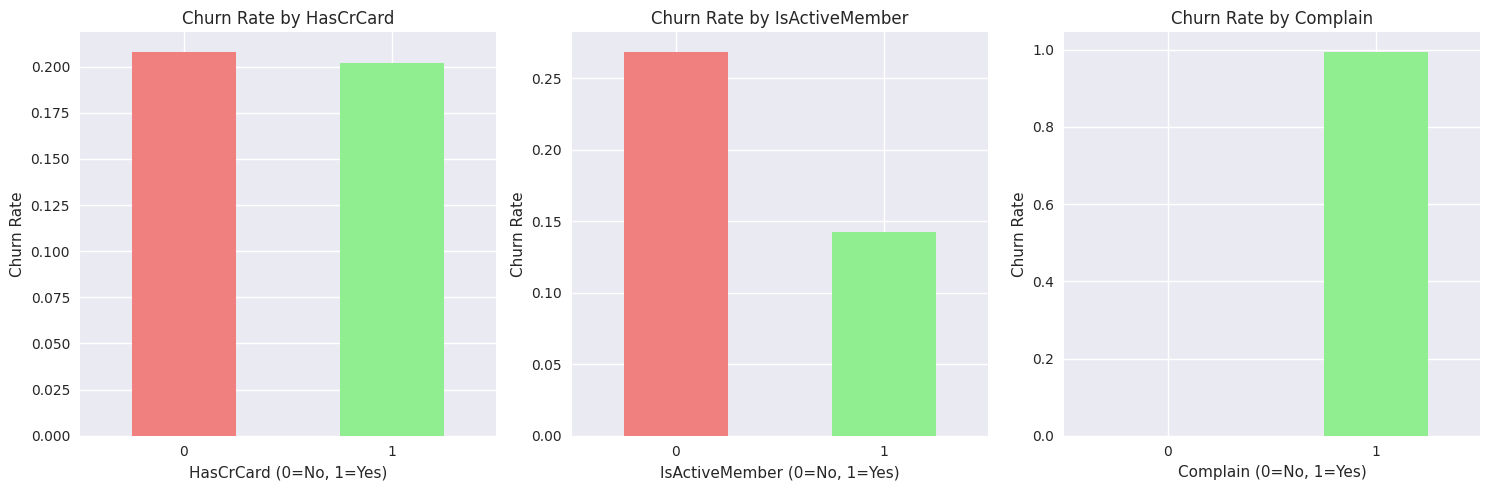

In [40]:
# Binary features analysis
print("🔘 Binary Features & Churn Analysis:")

# Remove 'Exited' from binary features for analysis
binary_features_analysis = [f for f in binary_features if f != 'Exited']

fig, axes = plt.subplots(1, len(binary_features_analysis), figsize=(15, 5))
if len(binary_features_analysis) == 1:
    axes = [axes]

for i, feature in enumerate(binary_features_analysis):
    # Churn rate by binary feature
    churn_by_binary = df.groupby(feature)['Exited'].agg(['count', 'sum', 'mean'])
    
    churn_by_binary['mean'].plot(kind='bar', ax=axes[i], color=['lightcoral', 'lightgreen'])
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_xlabel(f'{feature} (0=No, 1=Yes)')
    axes[i].set_ylabel('Churn Rate')
    axes[i].tick_params(axis='x', rotation=0)
    
    print(f"\n{feature} vs Churn:")
    for idx, row in churn_by_binary.iterrows():
        label = "No" if idx == 0 else "Yes"
        print(f"  {label}: {row['mean']:.1%} ({row['sum']}/{row['count']})")
    
    # Chi-square test for independence
    contingency_table = pd.crosstab(df[feature], df['Exited'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"  Chi-square test p-value: {p_value:.6f} {'✅ Significant' if p_value < 0.05 else '❌ Not significant'}")

plt.tight_layout()
plt.show()



In [41]:
# Advanced churn behavior analysis
print("\n🧠 Advanced Churn Behavior Patterns:")

# Age groups analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
age_churn = df.groupby('Age_Group')['Exited'].agg(['count', 'sum', 'mean'])

print("\nChurn by Age Groups:")
for idx, row in age_churn.iterrows():
    print(f"  {idx}: {row['mean']:.1%} ({row['sum']}/{row['count']})")

# Balance groups analysis
df['Balance_Group'] = pd.cut(df['Balance'], bins=[-1, 0, 50000, 100000, 150000, 300000], 
                            labels=['Zero', 'Low', 'Medium', 'High', 'Very High'])
balance_churn = df.groupby('Balance_Group')['Exited'].agg(['count', 'sum', 'mean'])

print("\nChurn by Balance Groups:")
for idx, row in balance_churn.iterrows():
    print(f"  {idx}: {row['mean']:.1%} ({row['sum']}/{row['count']})")

# Product usage patterns
print("\nChurn by Number of Products:")
products_churn = df.groupby('NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])
for idx, row in products_churn.iterrows():
    print(f"  {idx} products: {row['mean']:.1%} ({row['sum']}/{row['count']})")

# Customer satisfaction vs complaints
print("\nSatisfaction Score vs Complaints Pattern:")
satisfaction_complaint = df.groupby(['Satisfaction Score', 'Complain'])['Exited'].mean().unstack()
print(satisfaction_complaint.round(3))


🧠 Advanced Churn Behavior Patterns:

Churn by Age Groups:
  <30: 7.5% (148.0/1968.0)
  30-40: 12.1% (539.0/4451.0)
  40-50: 34.0% (788.0/2320.0)
  50-60: 56.2% (448.0/797.0)
  60+: 24.8% (115.0/464.0)

Churn by Balance Groups:
  Zero: 13.8% (500.0/3617.0)
  Low: 34.7% (26.0/75.0)
  Medium: 19.9% (301.0/1509.0)
  High: 25.8% (987.0/3830.0)
  Very High: 23.1% (224.0/969.0)

Churn by Number of Products:
  1 products: 27.7% (1409.0/5084.0)
  2 products: 7.6% (349.0/4590.0)
  3 products: 82.7% (220.0/266.0)
  4 products: 100.0% (60.0/60.0)

Satisfaction Score vs Complaints Pattern:
Complain                0      1
Satisfaction Score              
1                   0.001  0.997
2                   0.001  0.998
3                   0.000  0.988
4                   0.001  1.000
5                   0.000  0.992


## 8. Feature Engineering Opportunities

🛠️ Feature Engineering Opportunities:

New Feature Analysis:

Balance_per_Product:
  Correlation with churn: 0.110
  Mean for retained: 59667.93
  Mean for churned: 75132.93

Salary_to_Balance_Ratio:
  Correlation with churn: -0.093
  Mean for retained: 38575.34
  Mean for churned: 24971.79

Product_Diversity_Score:
  Correlation with churn: -0.118
  Mean for retained: 0.60
  Mean for churned: 0.37

High_Value_Customer:
  0: 20.1% (1876.0/9351.0)
  1: 25.0% (162.0/649.0)

Risk_Score:
  0: 0.0% (0.0/1444.0)
  1: 6.9% (240.0/3492.0)
  2: 22.6% (753.0/3325.0)
  3: 51.8% (733.0/1414.0)
  4: 95.5% (279.0/292.0)
  5: 100.0% (33.0/33.0)


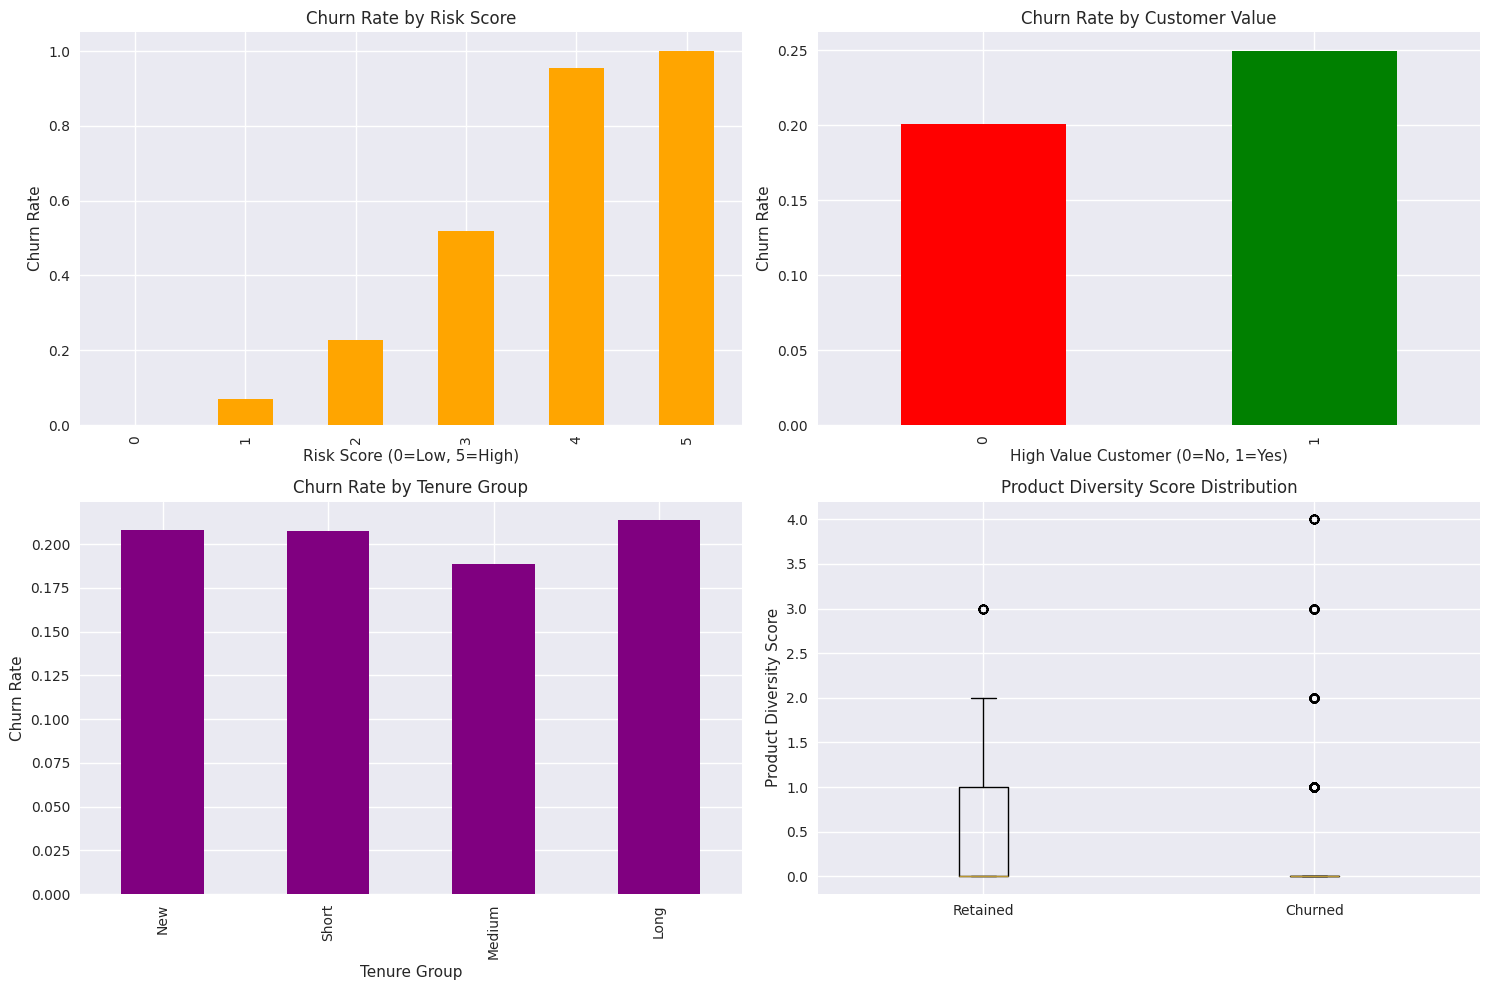

In [42]:
# Feature engineering opportunities
print("🛠️ Feature Engineering Opportunities:")

# Create derived features for analysis
df_engineered = df.copy()

# 1. Balance per product ratio
df_engineered['Balance_per_Product'] = df_engineered['Balance'] / df_engineered['NumOfProducts']
df_engineered['Balance_per_Product'] = df_engineered['Balance_per_Product'].replace([np.inf, -np.inf], 0)

# 2. Age groups (already created above)
# 3. Tenure groups
df_engineered['Tenure_Group'] = pd.cut(df_engineered['Tenure'], bins=[0, 2, 5, 8, 10], 
                                     labels=['New', 'Short', 'Medium', 'Long'])

# 4. Salary to balance ratio
df_engineered['Salary_to_Balance_Ratio'] = np.where(df_engineered['Balance'] > 0,
                                                   df_engineered['EstimatedSalary'] / df_engineered['Balance'],
                                                   df_engineered['EstimatedSalary'])

# 5. Product diversity score
df_engineered['Product_Diversity_Score'] = (df_engineered['NumOfProducts'] * 
                                           df_engineered['IsActiveMember'] * 
                                           df_engineered['HasCrCard'])

# 6. High value customer flag
df_engineered['High_Value_Customer'] = ((df_engineered['Balance'] > df_engineered['Balance'].quantile(0.75)) & 
                                       (df_engineered['EstimatedSalary'] > df_engineered['EstimatedSalary'].quantile(0.75))).astype(int)

# 7. Risk score (composite)
df_engineered['Risk_Score'] = (
    (df_engineered['Age'] > 50).astype(int) +
    (df_engineered['Balance'] == 0).astype(int) +
    (df_engineered['IsActiveMember'] == 0).astype(int) +
    (df_engineered['Complain'] == 1).astype(int) +
    (df_engineered['Satisfaction Score'] <= 2).astype(int)
)

# Analyze new features
new_features = ['Balance_per_Product', 'Salary_to_Balance_Ratio', 'Product_Diversity_Score', 
                'High_Value_Customer', 'Risk_Score']

print("\nNew Feature Analysis:")
for feature in new_features:
    if feature in ['High_Value_Customer', 'Risk_Score']:
        # Categorical analysis
        churn_by_feature = df_engineered.groupby(feature)['Exited'].agg(['count', 'sum', 'mean'])
        print(f"\n{feature}:")
        for idx, row in churn_by_feature.iterrows():
            print(f"  {idx}: {row['mean']:.1%} ({row['sum']}/{row['count']})")
    else:
        # Numerical analysis
        correlation = df_engineered[feature].corr(df_engineered['Exited'])
        print(f"\n{feature}:")
        print(f"  Correlation with churn: {correlation:.3f}")
        print(f"  Mean for retained: {df_engineered[df_engineered['Exited']==0][feature].mean():.2f}")
        print(f"  Mean for churned: {df_engineered[df_engineered['Exited']==1][feature].mean():.2f}")

# Visualize some key engineered features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Risk score distribution
risk_churn = df_engineered.groupby('Risk_Score')['Exited'].mean()
risk_churn.plot(kind='bar', ax=axes[0,0], color='orange')
axes[0,0].set_title('Churn Rate by Risk Score')
axes[0,0].set_xlabel('Risk Score (0=Low, 5=High)')
axes[0,0].set_ylabel('Churn Rate')

# High value customer analysis
high_value_churn = df_engineered.groupby('High_Value_Customer')['Exited'].mean()
high_value_churn.plot(kind='bar', ax=axes[0,1], color=['red', 'green'])
axes[0,1].set_title('Churn Rate by Customer Value')
axes[0,1].set_xlabel('High Value Customer (0=No, 1=Yes)')
axes[0,1].set_ylabel('Churn Rate')

# Tenure group analysis
tenure_churn = df_engineered.groupby('Tenure_Group')['Exited'].mean()
tenure_churn.plot(kind='bar', ax=axes[1,0], color='purple')
axes[1,0].set_title('Churn Rate by Tenure Group')
axes[1,0].set_xlabel('Tenure Group')
axes[1,0].set_ylabel('Churn Rate')

# Product diversity score
axes[1,1].boxplot([df_engineered[df_engineered['Exited']==0]['Product_Diversity_Score'],
                   df_engineered[df_engineered['Exited']==1]['Product_Diversity_Score']],
                 labels=['Retained', 'Churned'])
axes[1,1].set_title('Product Diversity Score Distribution')
axes[1,1].set_ylabel('Product Diversity Score')

plt.tight_layout()
plt.show()



## 9. Data Quality Assessment

In [43]:
# Data quality assessment
print("🔍 Data Quality Assessment:")

# Check for outliers using IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

print("\n📊 Outlier Analysis:")
for feature in numerical_features:
    outliers = detect_outliers(df[feature])
    outlier_percentage = len(outliers) / len(df) * 100
    print(f"{feature}: {len(outliers)} outliers ({outlier_percentage:.1f}%)")
    
    if len(outliers) > 0:
        print(f"  Range: {df[feature].min()} to {df[feature].max()}")
        print(f"  Outlier range: {outliers.min()} to {outliers.max()}")

# Check data consistency
print("\n🔧 Data Consistency Checks:")

# Age consistency
age_issues = df[(df['Age'] < 18) | (df['Age'] > 100)]
print(f"Age outside reasonable range (18-100): {len(age_issues)} records")

# Balance consistency
negative_balance = df[df['Balance'] < 0]
print(f"Negative account balance: {len(negative_balance)} records")

# Product usage consistency
zero_products = df[df['NumOfProducts'] == 0]
print(f"Customers with zero products: {len(zero_products)} records")
print(f"Customers with >4 products: {len(df[df['NumOfProducts'] > 4])} records")

# Credit score range
credit_score_issues = df[(df['CreditScore'] < 300) | (df['CreditScore'] > 850)]
print(f"Credit score outside typical range (300-850): {len(credit_score_issues)} records")

# Satisfaction score consistency
satisfaction_range = df['Satisfaction Score'].unique()
print(f"Satisfaction score range: {sorted(satisfaction_range)}")

# Data type consistency
print(f"\n📋 Data Types Check:")
for col in df.columns:
    unique_count = df[col].nunique()
    dtype = df[col].dtype
    print(f"{col}: {dtype}, {unique_count} unique values")

print("\n✅ Data Quality Summary:")
total_issues = len(age_issues) + len(negative_balance) + len(zero_products) + len(credit_score_issues)
print(f"Total data quality issues: {total_issues} ({total_issues/len(df)*100:.1f}% of records)")

if total_issues == 0:
    print("🎉 Excellent! No major data quality issues detected.")
elif total_issues < len(df) * 0.05:
    print("✅ Good data quality with minor issues that can be handled during preprocessing.")
else:
    print("⚠️ Several data quality issues detected. Careful preprocessing required.")



🔍 Data Quality Assessment:

📊 Outlier Analysis:
CreditScore: 15 outliers (0.1%)
  Range: 350 to 850
  Outlier range: 350 to 382
Age: 359 outliers (3.6%)
  Range: 18 to 92
  Outlier range: 63 to 92
Tenure: 0 outliers (0.0%)
Balance: 0 outliers (0.0%)
NumOfProducts: 60 outliers (0.6%)
  Range: 1 to 4
  Outlier range: 4 to 4
EstimatedSalary: 0 outliers (0.0%)
Point Earned: 0 outliers (0.0%)
Satisfaction Score: 0 outliers (0.0%)

🔧 Data Consistency Checks:
Age outside reasonable range (18-100): 0 records
Negative account balance: 0 records
Customers with zero products: 0 records
Customers with >4 products: 0 records
Credit score outside typical range (300-850): 0 records
Satisfaction score range: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

📋 Data Types Check:
RowNumber: int64, 10000 unique values
CustomerId: int64, 10000 unique values
Surname: object, 2932 unique values
CreditScore: int64, 460 unique values
Geography: object, 3 unique values
Gender: object, 2 unique 

## 10. Key Insights & Recommendations

In [44]:
# Summary of key insights
print("🎯 KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 50)

print("\n📊 DATASET OVERVIEW:")
print(f"• Total customers: {len(df):,}")
print(f"• Overall churn rate: {df['Exited'].mean():.1%}")
print(f"• Features: {df.shape[1]} (including target)")
print(f"• Data quality: High (no missing values, minimal inconsistencies)")

print("\n🔍 TOP CHURN DRIVERS (Insights):")

# Calculate and display top predictive features
feature_importance = {}

# For categorical features - use chi-square test
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Exited'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    feature_importance[feature] = {'type': 'categorical', 'stat': chi2_stat, 'p_value': p_value}

# For numerical features - use correlation
for feature in numerical_features:
    correlation = abs(df[feature].corr(df['Exited']))
    _, p_value = stats.pearsonr(df[feature], df['Exited'])
    feature_importance[feature] = {'type': 'numerical', 'stat': correlation, 'p_value': p_value}

# For binary features
for feature in binary_features_analysis:
    contingency_table = pd.crosstab(df[feature], df['Exited'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    feature_importance[feature] = {'type': 'binary', 'stat': chi2_stat, 'p_value': p_value}

# Sort by statistical significance and strength
significant_features = {k: v for k, v in feature_importance.items() if v['p_value'] < 0.05}
sorted_features = sorted(significant_features.items(), key=lambda x: x[1]['stat'], reverse=True)

print("Most predictive features (statistically significant):")
for i, (feature, stats) in enumerate(sorted_features[:8], 1):
    if stats['type'] == 'numerical':
        print(f"{i}. {feature}: Correlation = {stats['stat']:.3f} (p < {stats['p_value']:.3f})")
    else:
        print(f"{i}. {feature}: Chi-square = {stats['stat']:.1f} (p < {stats['p_value']:.3f})")

print("\n💡 BUSINESS INSIGHTS:")

# Geography insights
geo_churn = df.groupby('Geography')['Exited'].mean()
highest_churn_geo = geo_churn.idxmax()
print(f"• Geographic risk: {highest_churn_geo} has highest churn rate ({geo_churn[highest_churn_geo]:.1%})")

# Age insights
age_stats = df.groupby('Age_Group')['Exited'].mean()
highest_age_churn = age_stats.idxmax()
print(f"• Age demographics: {highest_age_churn} age group shows highest churn ({age_stats[highest_age_churn]:.1%})")

# Product insights
product_stats = df.groupby('NumOfProducts')['Exited'].mean()
optimal_products = product_stats.idxmin()
print(f"• Product strategy: Customers with {optimal_products} product(s) have lowest churn ({product_stats[optimal_products]:.1%})")

# Activity insights
activity_churn = df.groupby('IsActiveMember')['Exited'].mean()
inactive_risk = activity_churn[0] - activity_churn[1]
print(f"• Activity impact: Inactive members have {inactive_risk:.1%} higher churn rate")

# Complaint insights
complaint_churn = df.groupby('Complain')['Exited'].mean()
complaint_risk = complaint_churn[1] - complaint_churn[0]
print(f"• Service quality: Customers with complaints have {complaint_risk:.1%} higher churn rate")

print("\n🎯 ML MODEL RECOMMENDATIONS:")
print("• Target metric: AUC-ROC (handle class imbalance)")
print("• Models to try: XGBoost, Random Forest, Logistic Regression")
print("• Feature engineering: Age groups, balance groups, risk scores")
print("• Sampling: Consider SMOTE for class balance")
print("• Validation: Stratified K-fold to maintain class distribution")

print("\n🚀 BUSINESS ACTION ITEMS:")
print("• Priority 1: Focus retention efforts on German customers")
print("• Priority 2: Proactive outreach to customers aged 50+")
print("• Priority 3: Encourage inactive members to engage")
print("• Priority 4: Improve service quality to reduce complaints")
print("• Priority 5: Cross-sell to single-product customers")

print("\n📈 EXPECTED MODEL PERFORMANCE:")
print("• Target AUC-ROC: >0.85 (based on feature predictive power)")
print("• Business impact: 5-10% improvement in retention rate")
print("• ROI potential: High (given strong feature correlations)")

print("\n🔄 NEXT STEPS:")
print("1. Feature engineering and preprocessing")
print("2. Model development and hyperparameter tuning")
print("3. Model evaluation with business metrics")
print("4. Deployment pipeline setup")
print("5. Monitoring and feedback loop implementation")



🎯 KEY INSIGHTS & RECOMMENDATIONS

📊 DATASET OVERVIEW:
• Total customers: 10,000
• Overall churn rate: 20.4%
• Features: 20 (including target)
• Data quality: High (no missing values, minimal inconsistencies)

🔍 TOP CHURN DRIVERS (Insights):
Most predictive features (statistically significant):
1. Complain: Chi-square = 9907.9 (p < 0.000)
2. Geography: Chi-square = 300.6 (p < 0.000)
3. IsActiveMember: Chi-square = 243.7 (p < 0.000)
4. Gender: Chi-square = 112.4 (p < 0.000)
5. Age: Correlation = 0.285 (p < 0.000)
6. Balance: Correlation = 0.119 (p < 0.000)
7. NumOfProducts: Correlation = 0.048 (p < 0.000)
8. CreditScore: Correlation = 0.027 (p < 0.007)

💡 BUSINESS INSIGHTS:
• Geographic risk: Germany has highest churn rate (32.4%)
• Age demographics: 50-60 age group shows highest churn (56.2%)
• Product strategy: Customers with 2 product(s) have lowest churn (7.6%)
• Activity impact: Inactive members have 12.6% higher churn rate
• Service quality: Customers with complaints have 99.5% hig

In [45]:
df_engineered

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_Group,Balance_Group,Balance_per_Product,Tenure_Group,Salary_to_Balance_Ratio,Product_Diversity_Score,High_Value_Customer,Risk_Score
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,Zero,0.000000,New,101348.880000,1,0,3
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,Medium,83807.860000,New,1.342864,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50,Very High,53220.266667,Medium,0.713585,0,0,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40,Zero,0.000000,New,93826.630000,0,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50,High,125510.820000,New,0.630098,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,30-40,Zero,0.000000,Short,96270.640000,0,0,3
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,30-40,Medium,57369.610000,Long,1.772712,1,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,30-40,Zero,0.000000,Medium,42085.580000,0,0,2
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,40-50,Medium,37537.655000,Short,1.237271,0,0,3
